In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"/content/adult.data"
df = pd.read_csv(file_path, header=None)
col=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Income']
len(col)

15

In [3]:
df.columns=col
df = df.applymap(lambda x: np.nan if str(x).strip() == '?' else x)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df=df.drop(columns=['fnlwgt'])

In [5]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


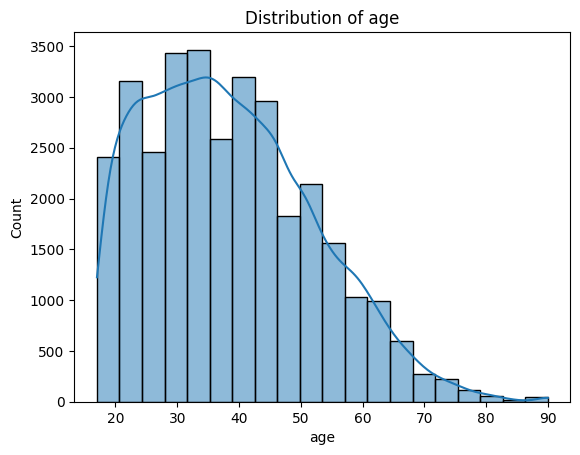

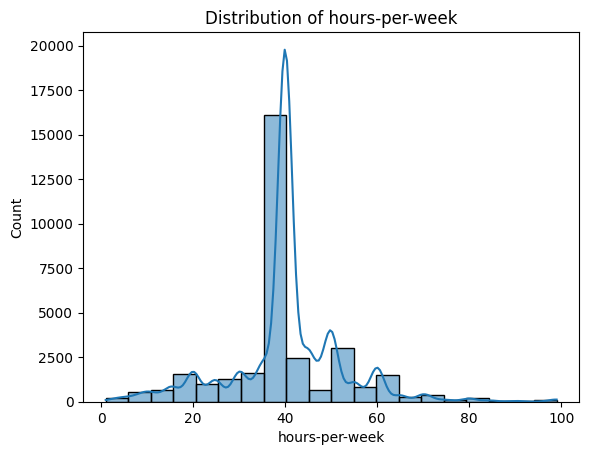

In [6]:
num_col=['age','hours-per-week']
for col in num_col:
    plt.figure()
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<ipython-input-7-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

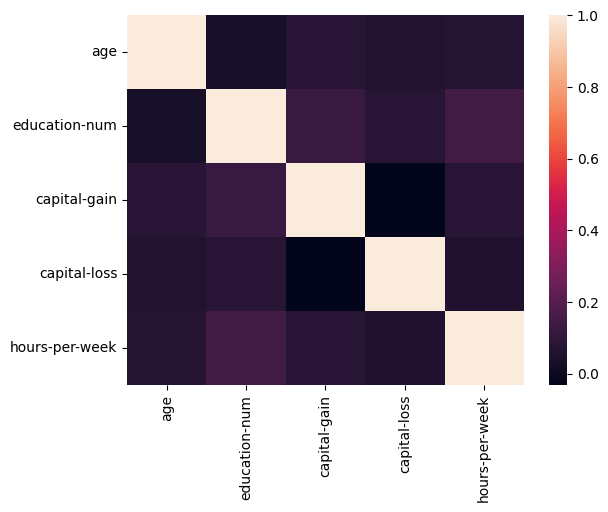

In [7]:
sns.heatmap(df.corr())

<Axes: xlabel='sex', ylabel='age'>

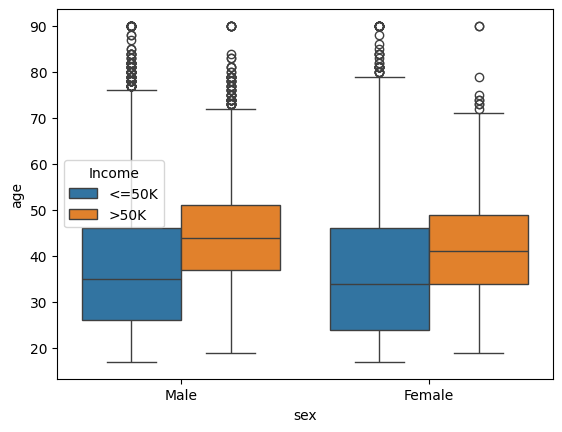

In [8]:
sns.boxplot(x='sex',y='age',hue='Income',data=df)

In [9]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [11]:
df.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [12]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [13]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [15]:
num_random_values = df['occupation'].isnull().sum()
possible_categories = df['occupation'].dropna().unique()
random_values = np.random.choice(possible_categories,num_random_values)
df.loc[df['occupation'].isnull(),'occupation'] = random_values

In [16]:
df['occupation'].isnull().sum()

0

In [17]:
imputer = SimpleImputer(strategy='most_frequent')

In [18]:
trf1 = ColumnTransformer(
    transformers=[
        ('Imputation', imputer, ['native-country', 'workclass'])
    ]
)





In [19]:
subset=trf1.fit_transform(df)
subset=pd.DataFrame(subset,columns=['native-country', 'workclass'])

In [20]:
df[['native-country','workclass']]=subset

In [21]:
df=df.dropna(subset=["education"])

In [22]:
num=[1,4,5,6,7,12]
col = df.columns[num]
for i in col:
    dictt=df[i].value_counts().to_dict()
    df[i]=df[i].map(dictt)
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,1298,Bachelors,13,10683,3879,8305,27816,Male,2174,0,40,29753,<=50K
1,50,2541,Bachelors,13,14976,4182,13193,27816,Male,0,0,13,29753,<=50K
2,38,24532,HS-grad,9,4443,1507,8305,27816,Male,0,0,40,29753,<=50K
3,53,24532,11th,7,14976,1507,13193,3124,Male,0,0,40,29753,<=50K
4,28,24532,Bachelors,13,14976,4262,1568,3124,Female,0,0,40,95,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,24532,Assoc-acdm,12,14976,1060,1568,27816,Female,0,0,38,29753,<=50K
32557,40,24532,HS-grad,9,14976,2142,13193,27816,Male,0,0,40,29753,>50K
32558,58,24532,HS-grad,9,993,3879,3446,27816,Female,0,0,40,29753,<=50K
32559,22,24532,HS-grad,9,10683,3879,5068,27816,Male,0,0,20,29753,<=50K


In [23]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
le=LabelEncoder()
y=le.fit_transform(y)

In [25]:
df['Income'].value_counts()

<=50K    24720
>50K      7841
Name: Income, dtype: int64

In [26]:
Oe=OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']]
)

In [27]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [28]:
X['education']=Oe.fit_transform(X[['education']])

In [29]:
ohe=OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False)
ohe=ohe.fit_transform(X[['sex']])
X['sex']=pd.DataFrame(ohe)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,1298,12.0,13,10683,3879,8305,27816,1.0,2174,0,40,29753
1,50,2541,12.0,13,14976,4182,13193,27816,1.0,0,0,13,29753
2,38,24532,8.0,9,4443,1507,8305,27816,1.0,0,0,40,29753
3,53,24532,6.0,7,14976,1507,13193,3124,1.0,0,0,40,29753
4,28,24532,12.0,13,14976,4262,1568,3124,0.0,0,0,40,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,24532,10.0,12,14976,1060,1568,27816,0.0,0,0,38,29753
32557,40,24532,8.0,9,14976,2142,13193,27816,1.0,0,0,40,29753
32558,58,24532,8.0,9,993,3879,3446,27816,0.0,0,0,40,29753
32559,22,24532,8.0,9,10683,3879,5068,27816,1.0,0,0,20,29753


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [33]:
lr=LogisticRegression()

In [34]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred=lr.predict(X_test)

In [36]:
accuracy_score(y_pred,y_test)

0.8000921234454169

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      5768
           1       0.32      0.66      0.43       745

    accuracy                           0.80      6513
   macro avg       0.63      0.74      0.65      6513
weighted avg       0.88      0.80      0.83      6513

